In [ ]:
"""
Cats vs Dogs image classifier 
 - image data generator 이용 : 학습 데이터셋 만들기 
"""

In [1]:
from tensorflow.keras import Sequential # keras model 
from tensorflow.keras.layers import Conv2D, MaxPool2D # Convolution layer
from tensorflow.keras.layers import Dense, Dropout, Flatten # Affine layer
import os

In [2]:
base_dir = "../image/cats_and_dogs"
train_dir = os.path.join(base_dir, 'train_dir')
validation_dir = os.path.join(base_dir, 'validation_dir')

# Hyper parameters
img_h = 150 # height
img_w = 150 # width
input_shape = (img_h, img_w, 3) 

In [3]:
# 1. CNN Model layer 
model = Sequential()

# Convolution layer1 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = input_shape))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution layer2 
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution layer3 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten layer : 3d -> 1d
model.add(Flatten()) 

# DNN hidden layer(Fully connected layer)
model.add(Dense(256, activation = 'relu'))

# DNN Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [4]:
# model training set : Adam or RMSprop 
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', # one hot encoding
              metrics = ['accuracy'])

In [5]:
# 2. image file preprocessing : image 제너레이터 이용  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/

# 특정 폴더의 이미지를 분류하기 위해서 학습시킬 데이터셋 생성
train_data = ImageDataGenerator(rescale=1./255)

# 검증 데이터 
validation_data = ImageDataGenerator(rescale=1./255)


train_generator = train_data.flow_from_directory(
        train_dir,
        target_size=(150,150), # image reshape
        batch_size=20, # batch size
        class_mode='binary') # binary label
# Found 2000 images belonging to 2 classes.

validation_generator = validation_data.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')
# Found 1000 images belonging to 2 classes.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
'''
케라스에서는 모델을 학습시킬 때 주로 fit() 함수를 사용하지만 
제네레이터로 생성된 배치로 학습시킬 경우에는 fit_generator() 함수를 사용합니다.

- 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정합니다. 
- steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정합니다. 
                    총 2000개의 훈련 샘플이 있고 배치사이즈가 20이므로 100 스텝으로 지정합니다.
- epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 
- validation_data : 검증데이터셋을 제공할 제네레이터를 지정합니다. 
- validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다. 
                     총 1000개의 검증 샘플이 있고 배치사이즈가 20이므로 50 스텝으로 지정합니다.
'''
# https://tykimos.github.io/2017/03/08/CNN_Getting_Started/

In [6]:
# 3. model training : image제너레이터 이용 모델 훈련 
model_fit = model.fit_generator(
          train_generator, 
          steps_per_epoch=100,
          epochs=10, 
          validation_data=validation_generator,
          validation_steps=50) 

Epoch 1/10
100/100 [==============================] - 161s 2s/step - loss: 0.7111 - accuracy: 0.5325 - val_loss: 0.6748 - val_accuracy: 0.6130
Epoch 2/10
100/100 [==============================] - 163s 2s/step - loss: 0.6550 - accuracy: 0.6305 - val_loss: 0.6651 - val_accuracy: 0.5930
Epoch 3/10
100/100 [==============================] - 160s 2s/step - loss: 0.6100 - accuracy: 0.6840 - val_loss: 0.6142 - val_accuracy: 0.6560
Epoch 4/10
100/100 [==============================] - 165s 2s/step - loss: 0.5384 - accuracy: 0.7175 - val_loss: 0.5973 - val_accuracy: 0.6850
Epoch 5/10
100/100 [==============================] - 168s 2s/step - loss: 0.4758 - accuracy: 0.7620 - val_loss: 0.6455 - val_accuracy: 0.6860
Epoch 6/10
100/100 [==============================] - 162s 2s/step - loss: 0.3976 - accuracy: 0.8170 - val_loss: 0.7768 - val_accuracy: 0.6530
Epoch 7/10
100/100 [==============================] - 163s 2s/step - loss: 0.3147 - accuracy: 0.8630 - val_loss: 0.9189 - val_accuracy: 0.6770

In [7]:
# 4. model history graph
import matplotlib.pyplot as plt
 
print(model_fit.history.keys())

loss = model_fit.history['loss'] # train
acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss'] # validation
val_acc = model_fit.history['val_accuracy']

epochs = range(1, len(acc) + 1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


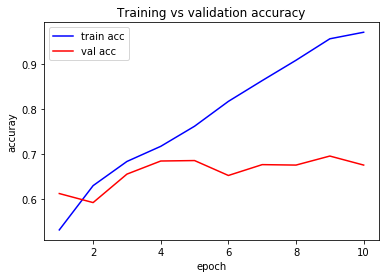

In [9]:
# acc vs val_acc   
plt.plot(epochs, acc, 'b', label='train acc')
plt.plot(epochs, val_acc, 'r', label='val acc')
plt.title('Training vs validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuray')
plt.legend(loc='best')
plt.show()

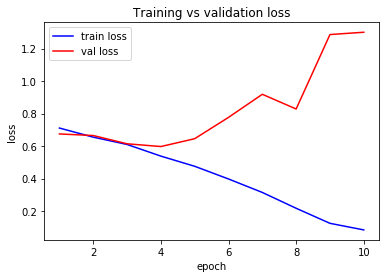

In [10]:
# loss vs val_loss 
plt.plot(epochs, loss, 'b', label='train loss')
plt.plot(epochs, val_loss, 'r', label='val loss')
plt.title('Training vs validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [11]:
# 1. CNN Model layer 
model = Sequential()

# Convolution layer1 : kernel[3,3,3,32]
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = input_shape))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution layer2 : kernel[3,3,32,64]
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution layer3 : kernel[5,5,64,128], maxpooling() 제외 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten layer :4d -> 2d
model.add(Flatten()) 
# 2차 적용 : 드롭아웃 - 과적합 해결 
model.add(Dropout(0.5)) # fully connected 층 이전에 배치 

# Affine layer(Fully connected layer1) : [n, 256]
model.add(Dense(256, activation = 'relu'))

# Output layer(Fully connected layer2) : [256, 1]
model.add(Dense(1, activation = 'sigmoid'))

model create


In [12]:
# model training set : Adam or RMSprop 
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', # one hot encoding
              metrics = ['accuracy'])

In [13]:
# 2. image file preprocessing : 이미지 제너레이터 이용  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1차 적용 
#train_data = ImageDataGenerator(rescale=1./255)

# 2차 적용 : image 증식 - 과적합 해결
train_data = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 40, # image 회전 각도 범위(+, - 범위)
        width_shift_range = 0.2, # image 수평 이동 범위
        height_shift_range = 0.2, # image 수직 이용 범위  
        shear_range = 0.2, # image 전단 각도 범위
        zoom_range=0.2, # image 확대 범위
        horizontal_flip=True,) # image 수평 뒤집기 범위 

# 검증 데이터에는 증식 적용 안함 
validation_data = ImageDataGenerator(rescale=1./255)


train_generator = train_data.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=35, 
        class_mode='binary') # binary label
# Found 2000 images belonging to 2 classes.

validation_generator = validation_data.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=35, # [수정] batch size 올림 
        class_mode='binary')
# Found 1000 images belonging to 2 classes.

image preprocessing
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
model_fit = model.fit_generator(
          train_generator, 
          steps_per_epoch=100, 
          epochs=10, # 30 epochs()
          validation_data=validation_generator,
          validation_steps=50)

Epoch 1/10
100/100 [==============================] - 295s 3s/step - loss: 0.6807 - accuracy: 0.5427 - val_loss: 0.6897 - val_accuracy: 0.5066
Epoch 2/10
100/100 [==============================] - 291s 3s/step - loss: 0.6673 - accuracy: 0.5902 - val_loss: 0.6512 - val_accuracy: 0.6052
Epoch 3/10
100/100 [==============================] - 290s 3s/step - loss: 0.6502 - accuracy: 0.6215 - val_loss: 0.6337 - val_accuracy: 0.6432
Epoch 4/10
100/100 [==============================] - 290s 3s/step - loss: 0.6284 - accuracy: 0.6369 - val_loss: 0.6089 - val_accuracy: 0.6611
Epoch 5/10
100/100 [==============================] - 287s 3s/step - loss: 0.6323 - accuracy: 0.6360 - val_loss: 0.6283 - val_accuracy: 0.6455
Epoch 6/10
100/100 [==============================] - 276s 3s/step - loss: 0.6248 - accuracy: 0.6494 - val_loss: 0.5883 - val_accuracy: 0.6715
Epoch 7/10
100/100 [==============================] - 279s 3s/step - loss: 0.5969 - accuracy: 0.6749 - val_loss: 0.5851 - val_accuracy: 0.6836

In [16]:
loss = model_fit.history['loss'] # train
acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss'] # validation
val_acc = model_fit.history['val_accuracy']

epochs = range(1, len(acc) + 1)

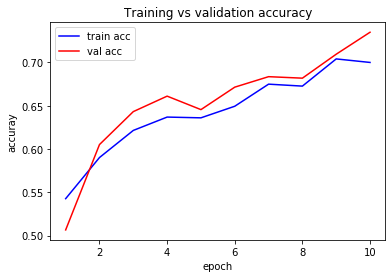

In [18]:
# acc vs val_acc   
plt.plot(epochs, acc, 'b', label='train acc')
plt.plot(epochs, val_acc, 'r', label='val acc')
plt.title('Training vs validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuray')
plt.legend(loc='best')
plt.show()

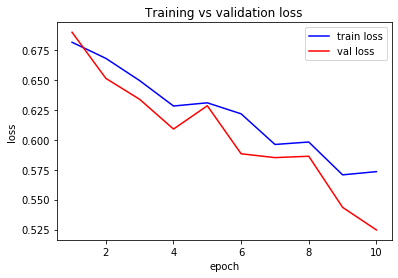

In [19]:
# loss vs val_loss 
plt.plot(epochs, loss, 'b', label='train loss')
plt.plot(epochs, val_loss, 'r', label='val loss')
plt.title('Training vs validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()